# Exploratory Data Analysis 

### Step 1. Install Dependencies

In [23]:
# Install Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2. Load Data and Basic Descriptives

In [24]:
# Read Data into data frame
df = pd.read_csv("education_career_success_csv.csv")

print(df.head)
# Basic checks
print(df.shape)
print(df.info())
print(df.describe())

<bound method NDFrame.head of      Student_ID  Age  Gender  High_School_GPA  SAT_Score  University_Ranking  \
0        S00001   24    Male             3.58       1052                 291   
1        S00002   21   Other             2.52       1211                 112   
2        S00003   28  Female             3.42       1193                 715   
3        S00004   25    Male             2.43       1497                 170   
4        S00005   22    Male             2.08       1012                 599   
...         ...  ...     ...              ...        ...                 ...   
4995     S04996   26  Female             2.44       1258                 776   
4996     S04997   18  Female             3.94       1032                 923   
4997     S04998   19  Female             3.45       1299                 720   
4998     S04999   19    Male             2.70       1038                 319   
4999     S05000   23  Female             2.19       1145                  82   

      Uni

### Step 3. Double Check for Null and Duplicate Values

In [25]:
# Double check for null and duplicate values
print(df.isnull().sum())
print(f"Duplicate Rows: {df.duplicated().sum()}")


Student_ID               0
Age                      0
Gender                   0
High_School_GPA          0
SAT_Score                0
University_Ranking       0
University_GPA           0
Field_of_Study           0
Internships_Completed    0
Projects_Completed       0
Certifications           0
Soft_Skills_Score        0
Networking_Score         0
Job_Offers               0
Starting_Salary          0
Career_Satisfaction      0
Years_to_Promotion       0
Current_Job_Level        0
Work_Life_Balance        0
Entrepreneurship         0
dtype: int64
Duplicate Rows: 0


### Step 4. Destribution of Numerical Columns

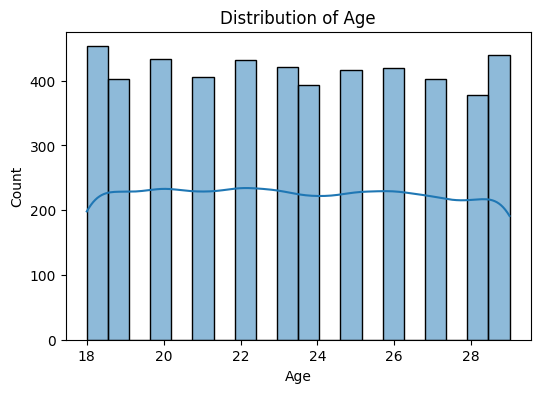

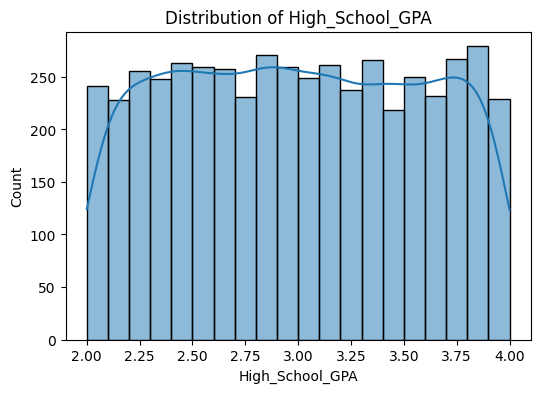

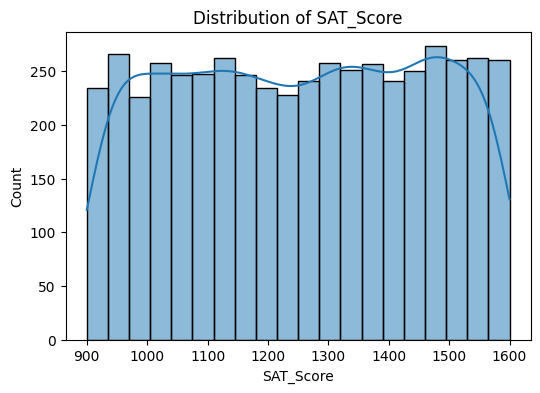

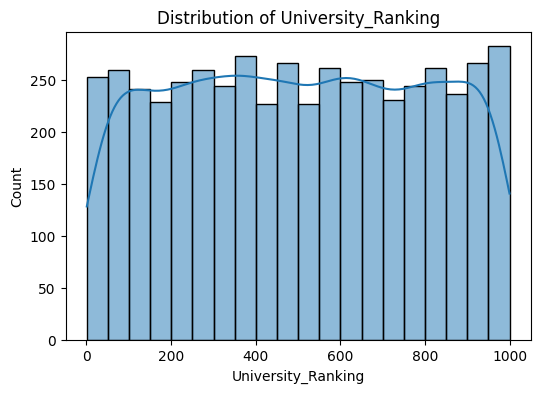

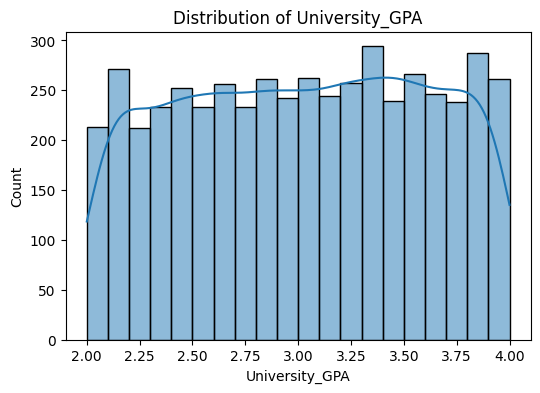

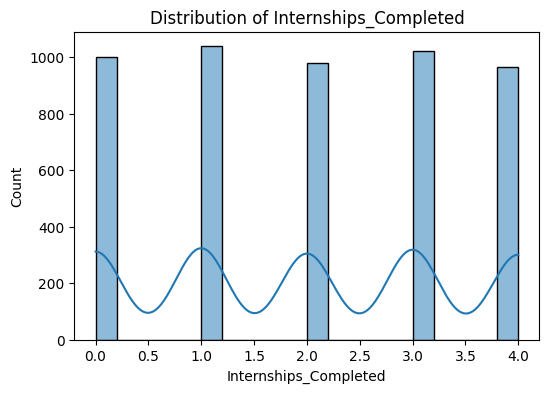

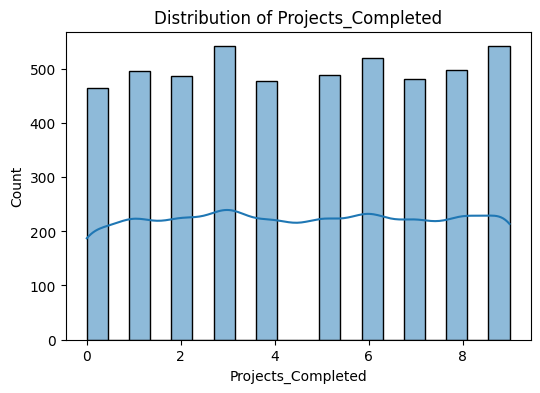

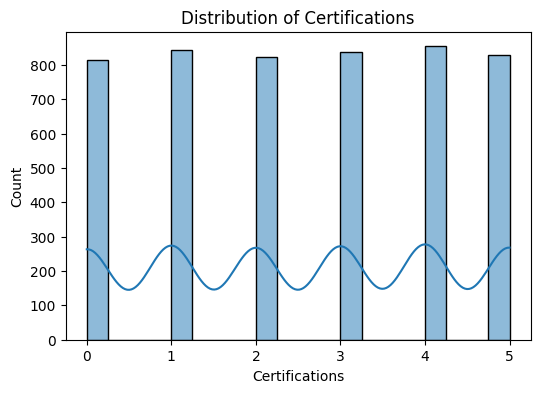

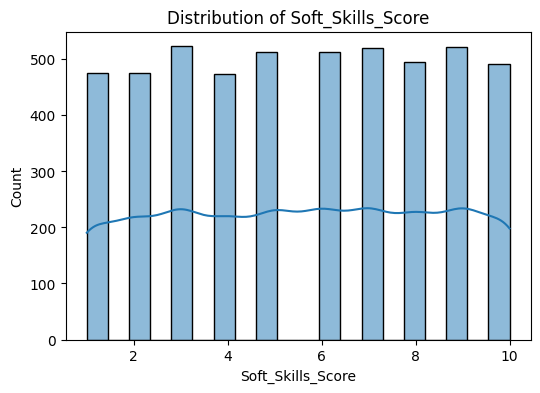

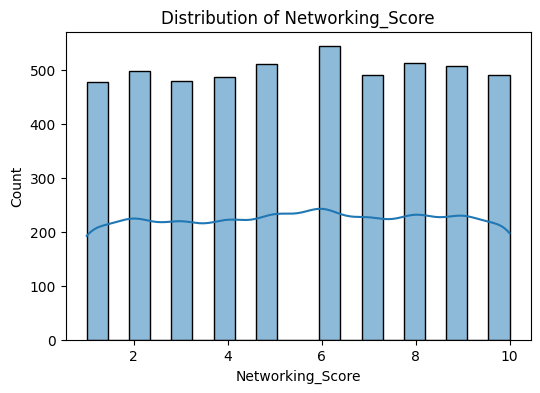

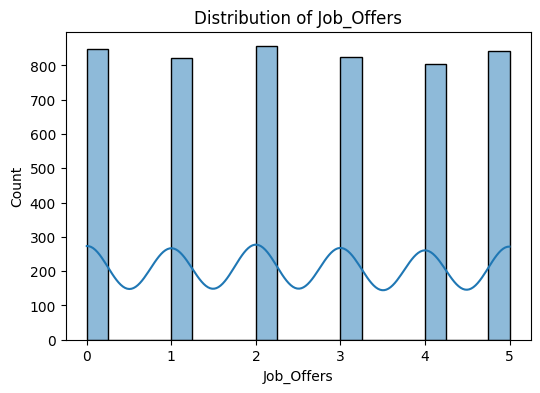

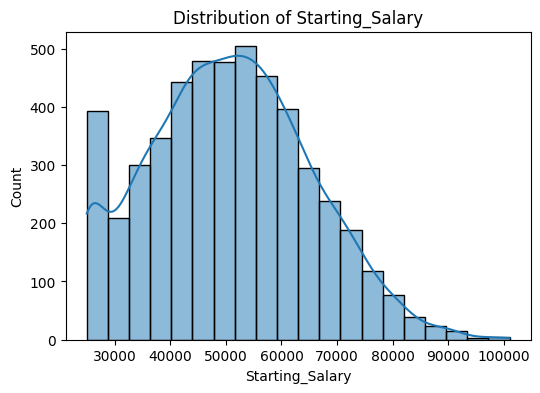

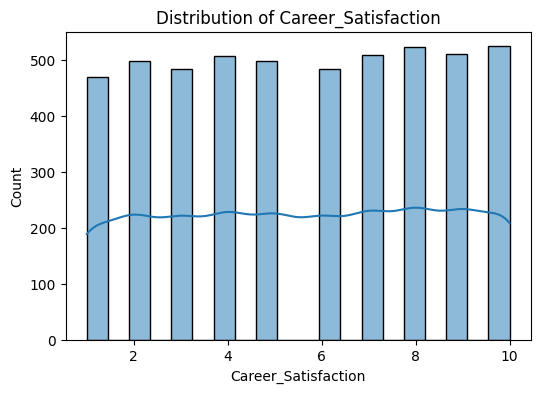

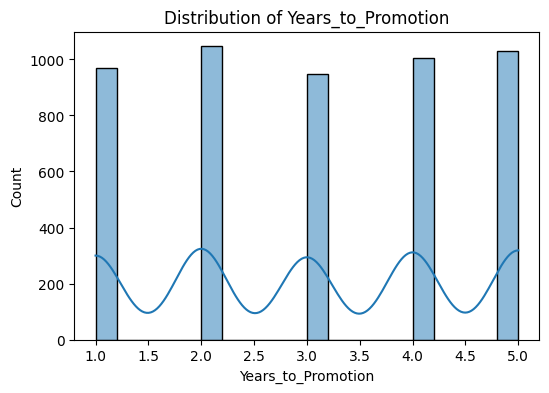

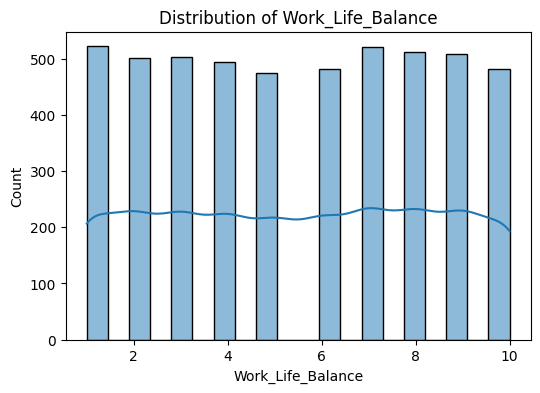

In [26]:
# Numerical Distributions
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.show()


### Step 5. Distribution of Categorical Columns

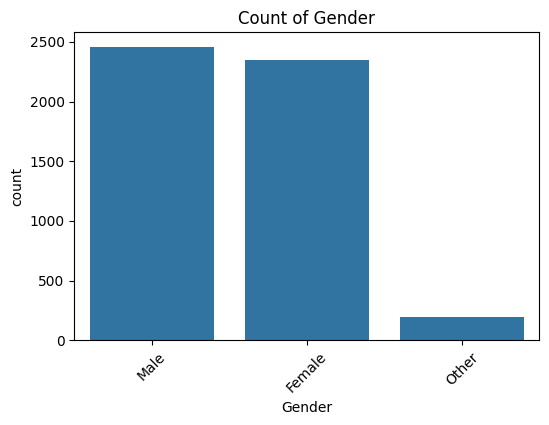

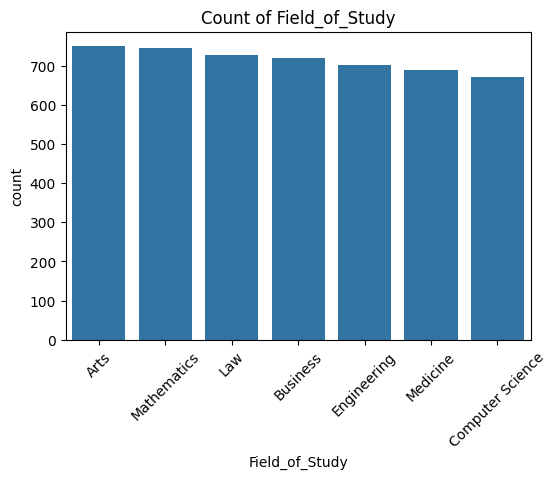

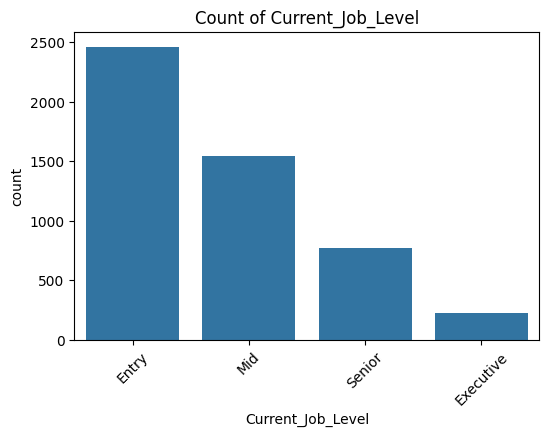

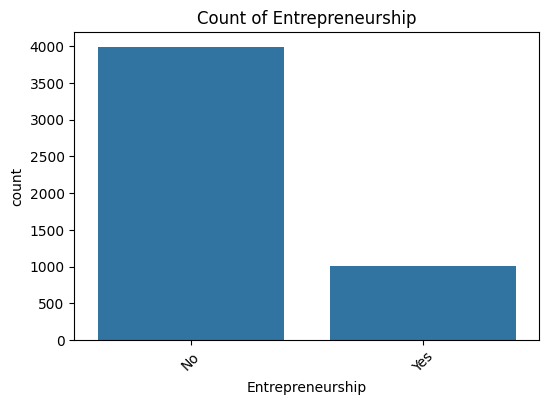

In [27]:
# Categorical Counts
cat_cols = df.select_dtypes(include='object').columns.drop('Student_ID')

for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()


### Step 6. Bivariate Analysis

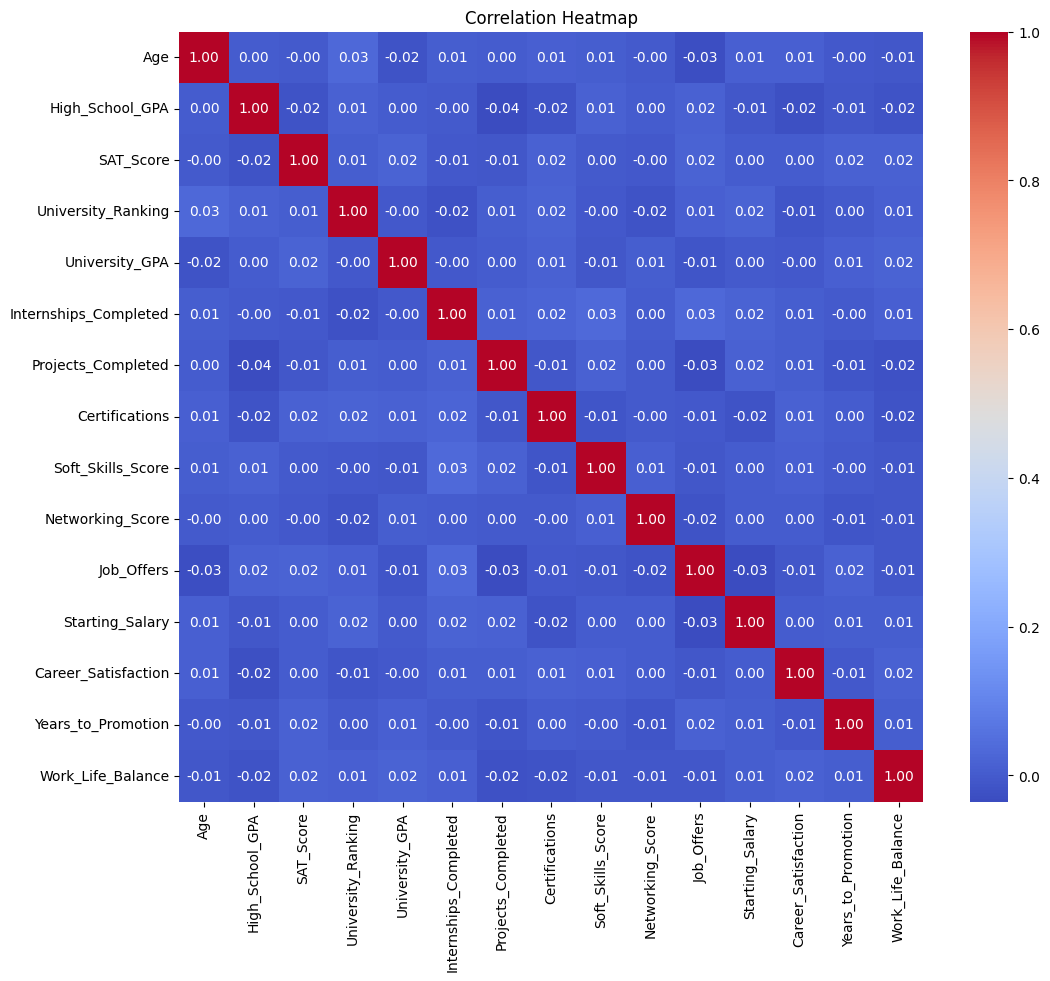

In [28]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


C:\Users\clayt\AppData\Local\Temp\ipykernel_24764\2824220065.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Starting_Salary', palette='Set3')


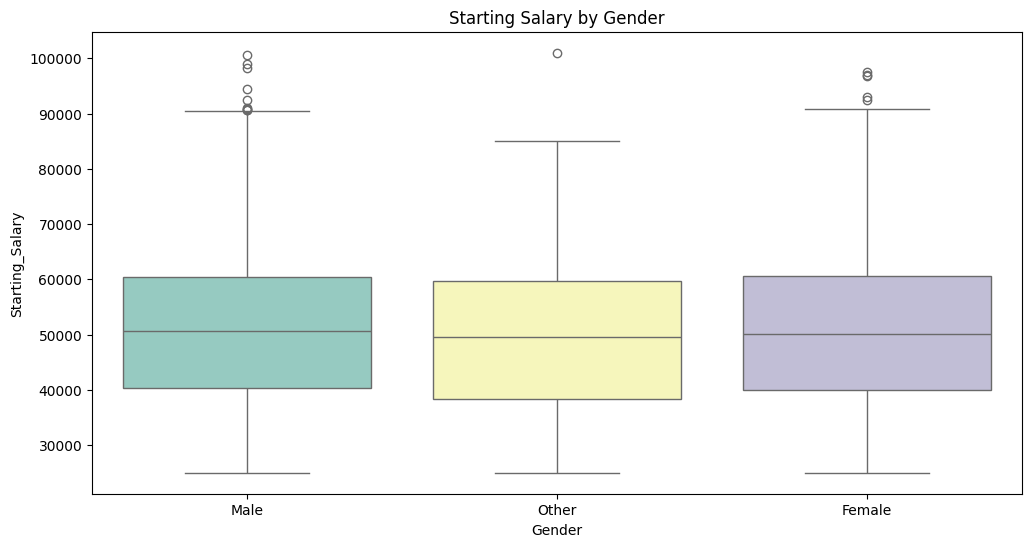

C:\Users\clayt\AppData\Local\Temp\ipykernel_24764\2824220065.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['Field_of_Study'].isin(top_fields)],


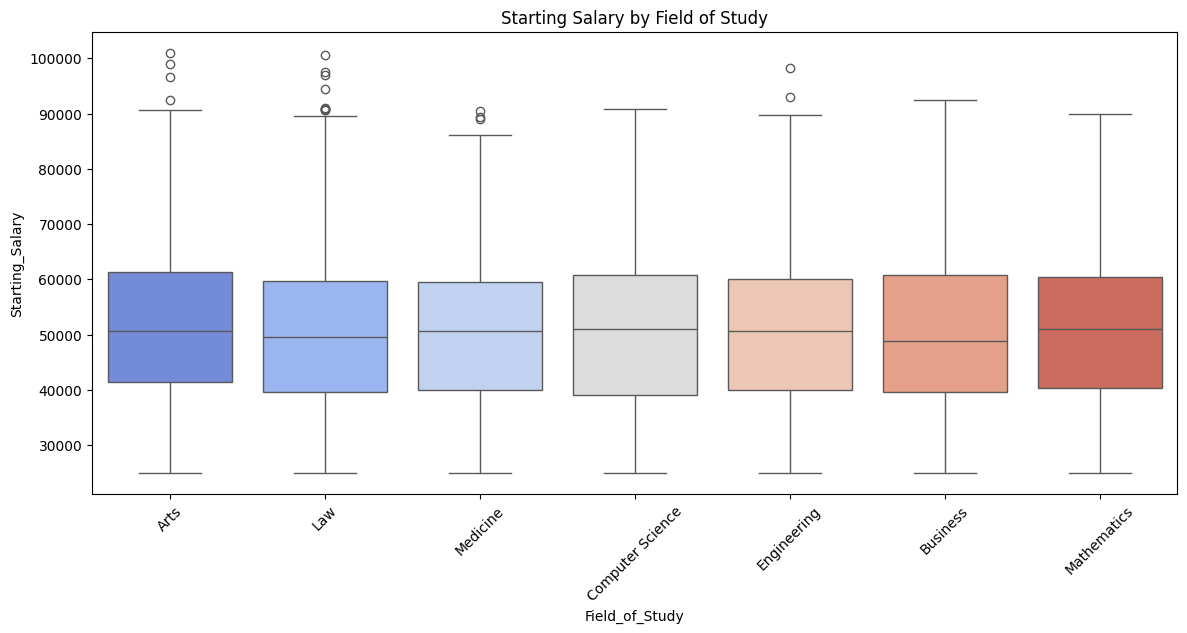

In [29]:
# Salary and Job Offers by Gender and Field of Study

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Gender', y='Starting_Salary', palette='Set3')
plt.title("Starting Salary by Gender")
plt.show()

top_fields = df['Field_of_Study'].value_counts().nlargest(8).index
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[df['Field_of_Study'].isin(top_fields)],
            x='Field_of_Study', y='Starting_Salary', palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Starting Salary by Field of Study")
plt.show()


### Step 7. Grouped Analysis

In [30]:
# Average salary and job offers by Job Level
print(df.groupby("Current_Job_Level")[["Starting_Salary", "Job_Offers"]].mean())

# Salary based on entrepreneurship
print(df.groupby("Entrepreneurship")["Starting_Salary"].mean())

# Promotion time by field
print(df.groupby("Field_of_Study")["Years_to_Promotion"].mean().sort_values())


                   Starting_Salary  Job_Offers
Current_Job_Level                             
Entry                 50471.051563    2.463256
Executive             50134.977578    2.560538
Mid                   50536.658031    2.525907
Senior                51037.402597    2.475325
Entrepreneurship
No     50519.964930
Yes    50736.111111
Name: Starting_Salary, dtype: float64
Field_of_Study
Mathematics         2.928859
Engineering         2.958631
Law                 3.016506
Arts                3.025367
Medicine            3.046444
Business            3.051460
Computer Science    3.091045
Name: Years_to_Promotion, dtype: float64


### Step 8. Initial Insights

#### Average Starting Salary and Job Offers by Job Level
Entry:	$50,471 and	2.46 offers <br>
Mid:	$50,537	and 2.53 offers <br>
Senior:	$51,037 and	2.48 offers <br>

**Insights:**

- Average starting salary increases slightly from Entry → Mid → Senior, but surprisingly drops at the Executive level.
- Job offers are relatively consistent across job levels (~2.5), with Executives getting slightly more, on average.
- This suggests job level alone doesn’t dramatically influence starting salary in this dataset — other variables likely play stronger roles.

#### Average Starting Salary with Entrepreneurship
No: $50,520 <br>
Yes: $50,736 <br>

**Insights:**
- Students who started a business earn slightly more (~$216 extra) on average.
- While the difference is small, it may imply entrepreneurial experience has a mild positive association with starting salary — or simply signals initiative and extra effort to employers.

#### Field of Study and Years of Promotion
Mathematics: 2.93 years <br>
Engineering:	2.96 years <br>
Law:	3.02 years <br>
Arts:	3.03 years <br>
Medicine:	3.05 years <br>
Business:	3.05 years <br> 
Computer Science: 3.09 years <br>

**Insights:**
- Math and Engineering grads tend to get promoted slightly faster than others, potentially due to demand and performance metrics being more quantifiable.
- Computer Science, despite its popularity, shows the longest average time to promotion (~3.09 years), which could suggest slower internal growth or higher starting levels delaying promotion.
- Overall, promotion timelines across fields are relatively tight (range ~0.16 years), suggesting field of study has some but not extreme impact.

